In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
dataset = pd.read_csv("dataset/spam.csv", encoding="ISO‑8859‑1")
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
dataset.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
dataset.shape

(5572, 2)

In [5]:
dataset.loc[dataset["v1"] == "ham"].shape[0]

4825

In [6]:
dataset.loc[dataset['v1'] == "spam"].shape[0]

747

<AxesSubplot:ylabel='v1'>

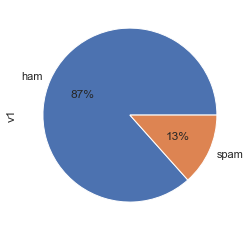

In [7]:
dataset['v1'].value_counts().plot(kind="pie", autopct="%1.0f%%", figsize=(4,4))

In [8]:
dataset_ham_count = dataset['v2'].str.split().str.len()

In [9]:
dataset_ham_count_index = dataset_ham_count.count().astype('str')+" words:"
dataset_ham_count_index

'5572 words:'

In [10]:
dataset.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [11]:
dataset_ham_count.sort_index(inplace=True)

In [27]:
X_messages

['Go until jurong point, crazy.. Available only in bugis great world la buffet... Cine there got amore wat...',
 'Ok lar... Joking wif oni...',
 "Free entry in 2 wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... c already then say...',
 "Nah don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your mobile 11 

In [12]:
dataset_spam_count = dataset['v2'].str.strip().str.len()

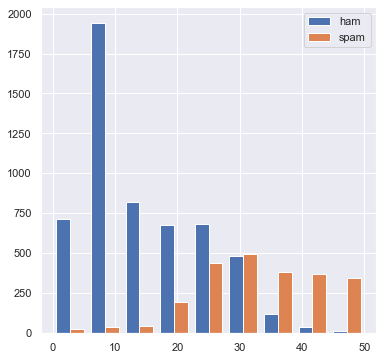

In [13]:
bins = np.linspace(0, 50, 10)
plt.figure(figsize=(6,6))
plt.hist([dataset_ham_count, dataset_spam_count], bins = bins, label=["ham","spam"])
plt.legend(loc = "upper right")
plt.show()                                                                   

In [14]:
import re
def text_preprocess(sen):
    sen = re.sub("a-zA-Z"," ", sen)
    sen = re.sub(r'\s+[a-zA-Z]\s+', ' ', sen)
    sen = re.sub(r'\s+', ' ', sen)
    return sen
    

In [15]:
X = dataset['v2']
y = dataset['v1']

In [16]:
X_messages = []
messages = X.to_list()
for mes in messages:
    X_messages.append(text_preprocess(mes))

In [17]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words = stopwords.words('english'))
X = tfidf_vector.fit_transform(X_messages).toarray()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, f1_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
Classifier = RandomForestClassifier()
Classifier.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
Classifier.score(X_test, y_test)

0.9811659192825112

In [22]:
y_pred = Classifier.predict(X_test)
y_pred[:10]

array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham'], dtype=object)

In [23]:
balanced_accuracy_score(y_pred, y_test)

0.9797052154195012

In [24]:
f1_score(y_pred, y_test, pos_label='ham')

0.9892030848329048

In [25]:
import joblib

joblib.dump(Classifier, "Models/model2.sav")

['Models/model2.sav']